In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:

# Data augmentation for training (optional)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# No augmentation for validation/test (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from folders
train_generator = train_datagen.flow_from_directory(
    'data/Train',
    target_size=(150, 150),  # Adjust based on your needs
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
)

val_generator = val_datagen.flow_from_directory(
    'data/Valid',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    'data/Test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # Important for correct evaluation
)

Found 900 images belonging to 3 classes.
Found 299 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [3]:


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),  # Helps with training stability
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(256, (3, 3), activation='relu'),  # Additional conv layer
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),  # Additional dense layer
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

c:\Users\WILSON\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
)

c:\Users\WILSON\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 180s 5s/step - accuracy: 0.6434 - loss: 2.6033 - val_accuracy: 0.3368 - val_loss: 7.7267
Epoch 2/50
 1/28 ━━━━━━━━━━━━━━━━━━━━ 2:03 5s/step - accuracy: 0.8438 - loss: 1.5990

c:\Users\WILSON\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 520ms/step - accuracy: 0.8438 - loss: 1.5990 - val_accuracy: 0.3403 - val_loss: 8.2518
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 145s 5s/step - accuracy: 0.8434 - loss: 1.7404 - val_accuracy: 0.3264 - val_loss: 20.7528
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 519ms/step - accuracy: 0.9688 - loss: 0.1798 - val_accuracy: 0.3299 - val_loss: 21.9672
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.8658 - loss: 1.3342 - val_accuracy: 0.3264 - val_loss: 23.0085
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 489ms/step - accuracy: 0.7500 - loss: 0.4008 - val_accuracy: 0.3368 - val_loss: 24.5199
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.8437 - loss: 1.4602 - val_accuracy: 0.3368 - val_loss: 21.4804
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 505ms/step - accuracy: 1.0000 - loss: 0.0172 - val_accuracy: 0.3403 - val_loss: 21.6711
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.8555 - loss: 1.2315 - val_accuracy: 0.3438 

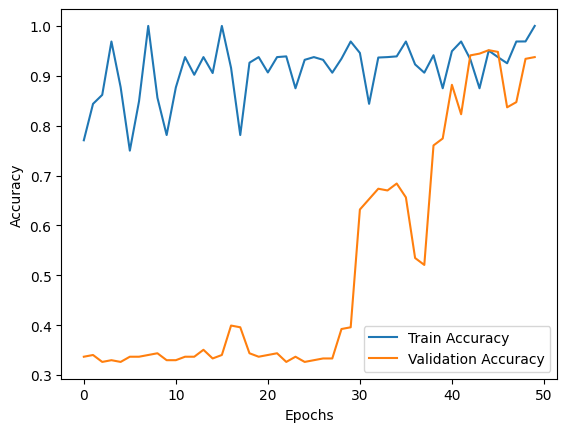

In [11]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 986ms/step - accuracy: 0.9438 - loss: 0.1183
Test Accuracy: 93.33%


In [21]:
import joblib  # Directly import joblib

In [ ]:
class_names = ['healthy', 'early_blight', 'late_blight']  # replace with your actual classes
# joblib.dump({'model': model, 'class_names': class_names}, 'potato_classifier.pkl')

['potato_classifier.pkl']

In [39]:
# During training
joblib.dump({
    'model': model,
    'class_names': list(train_generator.class_indices.keys()),
    'input_shape': (150, 150, 3)  # Optional: save preprocessing info
}, 'potato_classifier.pkl')

['potato_classifier.pkl']

In [23]:
model = joblib.load('potatoe_classifier.pkl')

In [36]:
# from tensorflow.keras.models import load_model
import cv2
import numpy as np

# model = load_model('b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG')

def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    pred = model.predict(img)
    class_idx = np.argmax(pred)
    class_label = list(train_generator.class_indices.keys())[class_idx]
    return class_label, pred[0][class_idx]

# Example usage
image_path = "Potato_healthy-72-_0_464.jpg"
pred_class, confidence = predict_image(image_path)
print(f"Predicted: {pred_class} (Confidence: {confidence:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
Predicted: Potato___Late_blight (Confidence: 0.59)
